<a href="https://colab.research.google.com/github/Mugilansenthil/Handwriting_Recognition/blob/main/Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [7]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 6s 25ms/step - loss: 0.1495 - val_loss: 0.1351
Epoch 2/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1306 - val_loss: 0.1243
Epoch 3/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1219 - val_loss: 0.1173
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1161 - val_loss: 0.1127
Epoch 5/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1124 - val_loss: 0.1097
Epoch 6/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1092 - val_loss: 0.1065
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1068 - val_loss: 0.1048
Epoch 8/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1046 - val_loss: 0.1024
Epoch 9/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1022 - val_loss: 0.1000
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.100

In [10]:
encoder = Model(input_img, encoded)

In [11]:
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


In [13]:
import matplotlib.pyplot as plt

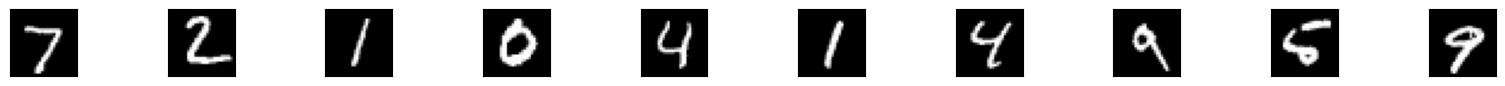

In [33]:
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(4, n, i+ 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

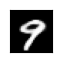

In [45]:
ax = plt.subplot(2, n, i +1 + n)
plt.imshow(decoded_imgs[i].reshape(28, 28)) # Fix the indentation
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()